# Introduction
Inspired by predicting sales of things dependent of multivariate observations (eg day of week, holidays) and so on

## Prepare data
Before using deflate train and test data that has been downloaded before (kaggle competitions download -c rossmann-store-sales).

```
unzip -d ./input/rossmann-store-sales.zip ./input/
```

## Further literature
- [kaggle competition](https://www.kaggle.com/c/rossmann-store-sales)
- https://www.mdpi.com/2306-5729/4/1/15
- http://cs229.stanford.edu/proj2015/205_report.pdf


In [38]:
from pandas.core.groupby import DataFrameGroupBy
import pandas as pd
from pandas import DataFrame

df_train: DataFrame = pd.read_csv('./input/train.csv', parse_dates=['Date'], dtype={'StateHoliday': str, 'Open': bool, 'Promo': bool, 'SchoolHoliday': str})

# FEATURE ENGINEERING
## month
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).to_period('M')

df_train.info()
#df_train.head(5)

# df_train MONTHLY aggregate
s_sales_monthly: pd.Series = df_train.groupby(by=['Store', 'Month']).Sales.sum()
df_sales_monthly = s_sales_monthly.reset_index(drop=False) # Sets columns of MUltiIndex as columns of dataframe with drop=False
df_sales_monthly['Month_str'] = df_sales_monthly['Month'].map(lambda month_period:month_period.strftime('%Y-%m'))
print(df_sales_monthly.head(10))

# Count of month per Store
#print(df_sales_monthly.groupby(by=['Store']).count())

df_sales_monthly_stores_range = df_sales_monthly[(df_sales_monthly['Store'] < 6) & (df_sales_monthly['Store'] > 0)]

# First 10 stores
df_train_stores_range = df_train[(df_train['Store'] < 6) & (df_train['Store'] > 0)]
#df_train_stores_5.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  bool          
 6   Promo          1017209 non-null  bool          
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  object        
 9   Month          1017209 non-null  period[M]     
dtypes: bool(2), datetime64[ns](1), int64(4), object(2), period[M](1)
memory usage: 64.0+ MB
   Store    Month   Sales Month_str
0      1  2013-01  128431   2013-01
1      1  2013-02  125271   2013-02
2      1  2013-03  145169   2013-03
3      1  2013

Plot monthly sales per Store

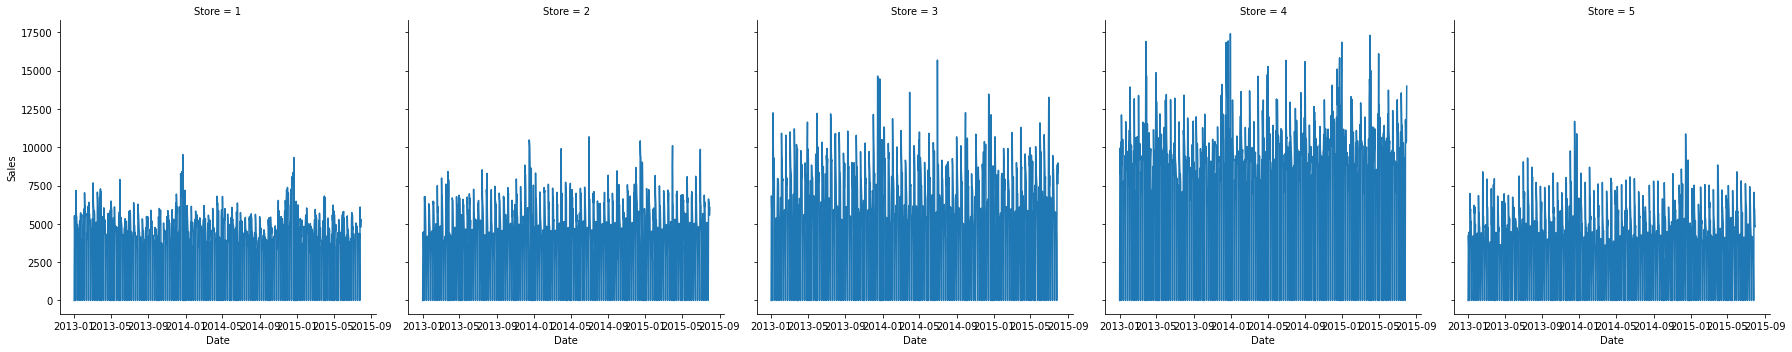

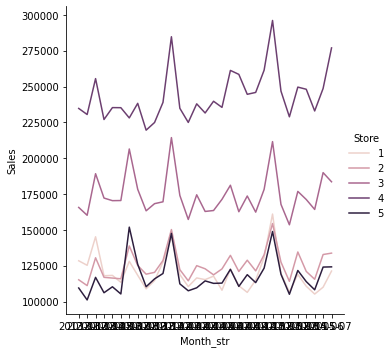

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(
    data=df_train_stores_range, x="Date", y="Sales", col="Store", kind="line")
plt.show()

sns.relplot(data=df_sales_monthly_stores_range, x="Month_str", y="Sales", hue="Store", kind='line')
plt.show()
